
# The structure of the notebook is based on the CRISP-DM methdology, including 6 steps:

- Business understanding
- Data understanding
- Data preparation
- (Modeling) -> not used, because of no classification / regression approaches 
- Evaluation
- Deployment


# 1) Business Understanding

If you are thinking about starting a career as a programmer, you might be interested in the followig questions:

- Which Developer Types are most popular ?

- What are the 3 most popular programming languages of the different developer types?

- Which combination of Developer Types are most popular (most correlated)?

Answering these main questions may provide some advice for undergraduate students, career changers or other people in choosing their direction of study. 



# 2) Data Understanding

This project will use developers survey data from stack overflow. The data was created on the year 2019.

Below are the steps to look at and understand the dataset.


In [17]:
# get necessary libraries
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [18]:
# read in the data
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [19]:
# get basic information of the dataset (e.g. available column-names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [20]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [21]:
num_rows = df.shape[0] # number of (#) rows
num_cols = df.shape[1] # number of columns
print("# rows: {}".format(num_rows))
print("# columns: {}".format(num_cols))

# rows: 88883
# columns: 85


There is no need to clean the whole dataset to answer the questions. Therefore the following three steps of the CRISP-DM process (data preparation, modeling,evaluation) were done for each question independently. The modeling will thereby sciped because no classification/regression tasks were performed


# Question 1:   Which developer types are most popular?

### 3) Data preparation

In [22]:
def get_df_of_interest(df, columns):
    """
    Return a dataframe with the corresponding columns & drop NaN values.
     
    Parameter:
    df: complete dataset (pandas data frame obj)
    columns: column names as a (list of strings)
    
    Returns:
    data: reduced & cleaned (no NaN) dataset with corresponding columns.
    """ 
    data = df[columns]   
    data.dropna(inplace=True)     
    return data


# create new dataframe with variables of interest 
df_question_1 = get_df_of_interest(df,['DevType']) 

# check column of DevType
df.DevType.unique()

array([nan,
       'Developer, desktop or enterprise applications;Developer, front-end',
       'Designer;Developer, back-end;Developer, front-end;Developer, full-stack',
       ...,
       'Developer, full-stack;Developer, game or graphics;Developer, mobile;Marketing or sales professional;Product manager',
       'Data or business analyst;Data scientist or machine learning specialist;Developer, full-stack;DevOps specialist;Engineer, data;Engineer, site reliability;Student',
       'Developer, QA or test;Student;System administrator'], dtype=object)

In [23]:
def split_strings_to_list(series,separator):
    """
    Return a splitted series.
     
    Parameter:
    series: containing string 
    seperator: seperator of string (e.g. ';')
    
    Returns:
    return a series containing lists of seperated strings
    """ 
    return series.apply(lambda x: x.split(separator))

# create a list of the DevType-strings to make it accessable 
df_question_1.DevType = split_strings_to_list(df_question_1.DevType,';')

# split DevTypes 
list_dev_types = [item for sublist in df_question_1.DevType for item in sublist]

# create a sorted dictionary (key = language, value = count)
dict_most_popular_dev_type = dict(Counter(list_dev_types).most_common())

### 5) Evaluation

In [24]:
# show the sorted dictionary
dict_most_popular_dev_type

{'Developer, full-stack': 42222,
 'Developer, back-end': 40665,
 'Developer, front-end': 26649,
 'Developer, desktop or enterprise applications': 17316,
 'Developer, mobile': 14698,
 'Student': 11921,
 'Database administrator': 9520,
 'Designer': 9182,
 'System administrator': 8929,
 'DevOps specialist': 8862,
 'Developer, embedded applications or devices': 7248,
 'Data scientist or machine learning specialist': 6460,
 'Developer, QA or test': 6359,
 'Data or business analyst': 6294,
 'Academic researcher': 5930,
 'Engineer, data': 5819,
 'Educator': 4492,
 'Developer, game or graphics': 4439,
 'Engineering manager': 4202,
 'Product manager': 4032,
 'Scientist': 3617,
 'Engineer, site reliability': 2951,
 'Senior executive/VP': 2107,
 'Marketing or sales professional': 975}

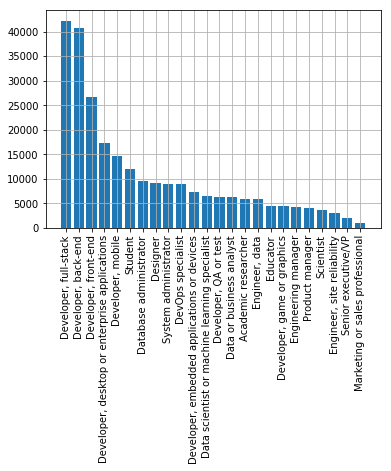

In [25]:
# visualize results (evaluation)
counts = dict_most_popular_dev_type.values()
dev_types = dict_most_popular_dev_type.keys()
dev_types

bar_x_locations = np.arange(len(counts))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, dev_types,rotation='vertical')
plt.grid()
plt.show()

# Question 2: What are the 3 most popular programming languages of the different developer types?
### 3) Data preparation

In [26]:
# get dummy variables for each DevType
df_question_2 = get_df_of_interest(df,['DevType','LanguageWorkedWith'])

# create a list of the DevType-strings & programming languages  
df_question_2.DevTypeSplit = split_strings_to_list(df_question_2.DevType,';')
df_question_2.LanguageWorkedWith = split_strings_to_list(df_question_2.LanguageWorkedWith,';')
# split DevTypes 
unique_dev_types = list(set([item for sublist in df_question_2.DevTypeSplit for item in sublist]))
unique_dev_types

['Developer, full-stack',
 'Data or business analyst',
 'Engineer, site reliability',
 'Marketing or sales professional',
 'Developer, front-end',
 'Database administrator',
 'Scientist',
 'Educator',
 'Data scientist or machine learning specialist',
 'Senior executive/VP',
 'Developer, mobile',
 'Developer, QA or test',
 'Developer, game or graphics',
 'DevOps specialist',
 'System administrator',
 'Developer, embedded applications or devices',
 'Academic researcher',
 'Student',
 'Developer, desktop or enterprise applications',
 'Engineer, data',
 'Developer, back-end',
 'Product manager',
 'Designer',
 'Engineering manager']

In [27]:
# create new dataframe for each person containing a subclass
most_popular_languages = []
for dev_type in (unique_dev_types):
    # create new dataframe for each subclass
    df_dev_type = df_question_2[df_question_2.DevType.str.contains(dev_type)]           
    # Flat the programming language series            
    l = [item for sublist in df_dev_type.LanguageWorkedWith for item in sublist]
    # create a sorted dictionary (key = language, value = count)
    sorted_dict = dict(Counter(l).most_common())
    # get the first 3 most popular languages
    most_popular_languages.append({k: sorted_dict[k] for k in list(sorted_dict)[:3]})
most_popular_languages

[{'JavaScript': 36376, 'HTML/CSS': 33329, 'SQL': 27674},
 {'SQL': 4650, 'HTML/CSS': 3909, 'JavaScript': 3860},
 {'JavaScript': 2049, 'Bash/Shell/PowerShell': 1890, 'HTML/CSS': 1853},
 {'HTML/CSS': 749, 'JavaScript': 700, 'SQL': 575},
 {'JavaScript': 23376, 'HTML/CSS': 22285, 'SQL': 15630},
 {'SQL': 7778, 'JavaScript': 7436, 'HTML/CSS': 7253},
 {'Python': 2513, 'HTML/CSS': 1846, 'JavaScript': 1764},
 {'JavaScript': 3151, 'HTML/CSS': 3151, 'SQL': 2557},
 {'Python': 5125, 'SQL': 3775, 'JavaScript': 3319},
 {'JavaScript': 1600, 'HTML/CSS': 1513, 'SQL': 1351},
 {'JavaScript': 9953, 'HTML/CSS': 9181, 'Java': 8409},
 {'JavaScript': 4666, 'HTML/CSS': 4471, 'SQL': 4121},
 {'JavaScript': 3064, 'HTML/CSS': 2946, 'C#': 2411},
 {'JavaScript': 6529, 'HTML/CSS': 5907, 'SQL': 5721},
 {'JavaScript': 6558, 'HTML/CSS': 6480, 'SQL': 6066},
 {'JavaScript': 4413, 'HTML/CSS': 4186, 'C++': 3702},
 {'Python': 3621, 'HTML/CSS': 3313, 'JavaScript': 3217},
 {'HTML/CSS': 8122, 'JavaScript': 7574, 'Java': 6482},
 {

### 5) Evaluation

In [28]:
# we can get an overwiew of the results by creating a new dataframe
list_most_popular = [list(language.keys()) for language in most_popular_languages]
pd.DataFrame(list_most_popular,index = unique_dev_types, columns = ['language 1','language 2','language 3'])

,language 1,language 2,language 3
"Developer, full-stack",JavaScript,HTML/CSS,SQL
Data or business analyst,SQL,HTML/CSS,JavaScript
"Engineer, site reliability",JavaScript,Bash/Shell/PowerShell,HTML/CSS
Marketing or sales professional,HTML/CSS,JavaScript,SQL
"Developer, front-end",JavaScript,HTML/CSS,SQL
Database administrator,SQL,JavaScript,HTML/CSS
Scientist,Python,HTML/CSS,JavaScript
Educator,JavaScript,HTML/CSS,SQL
Data scientist or machine learning specialist,Python,SQL,JavaScript
Senior executive/VP,JavaScript,HTML/CSS,SQL


# Question 3: Which combination of DevTypes are most popular (highly correlated)?

### 3) Data preparation

In [30]:
# get dummy variables for each DevType
df_question_3 = get_df_of_interest(df,['DevType'])

# create a list of the DevType-strings to make it accessable 
df_question_3.DevType = split_strings_to_list(df_question_3.DevType,';')

# get unique DevTypes (will be used as column names for new df)
unique_dev_types = list(set([item for sublist in df_question_3.DevType for item in sublist]))

# create a boolean array with matching elements 
matching_array = [] 
for individual_dev_types in df_question_3.DevType:
    # get idcs of matching devtypes
    idcs = [unique_dev_types.index(i) for i in individual_dev_types]
    matching_list = [False] * len(unique_dev_types)
    for idx in idcs:
        matching_list[idx] = True
    matching_array.append(matching_list)    

# create new df with columns corresponding to unique values
matching_df = pd.DataFrame(matching_array,columns = list(unique_dev_types))
matching_df.head()

,"Developer, full-stack",Data or business analyst,"Engineer, site reliability",Marketing or sales professional,"Developer, front-end",Database administrator,Scientist,Educator,Data scientist or machine learning specialist,Senior executive/VP,...,System administrator,"Developer, embedded applications or devices",Academic researcher,Student,"Developer, desktop or enterprise applications","Engineer, data","Developer, back-end",Product manager,Designer,Engineering manager
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,False,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


### 5) Evaluation

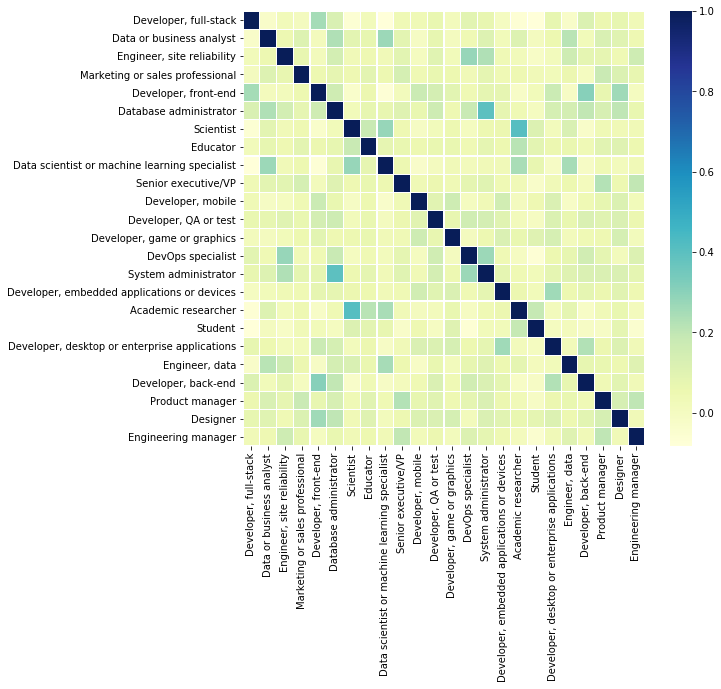

In [31]:
corrmat = matching_df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1); 


# 6) Deployment
Because the task was not to create a running app the results are published on a medium post, which you can find under:
https://medium.com/@marcel_79290/which-direction-should-your-developer-journey-go-5113c65366b0